In [1]:
import numpy
import csv
import re
import pandas as pd
b = './'
path_value = b + r"data - eurusd.csv"
data = pd.read_csv(path_value, header=None)
#data = pd.read_csv(path_value, names=['Text', 'Date', 'Time'], usecols=[5, 6, 7])
data

,0,1,2,3,4,5,6,7
0,Аналитические обзоры Форекс: ФРС повышает став...,Павел Власов,0,https://www.instaforex.com/ru/forex_analysis/3...,NaN,И хоть покупатели европейской валюты частично ...,02.06.2022,13:56
1,Аналитические обзоры Форекс: Евро дали отсрочку,Игорь Ковалев,1,https://www.instaforex.com/ru/forex_analysis/3...,NaN,"Не говори гоп, пока не перепрыгнешь. Шестой па...",02.06.2022,13:55
2,Аналитические обзоры Форекс: XAU/USD: в зоне к...,Юрий Толин,2,https://www.instaforex.com/ru/forex_analysis/3...,NaN,Как сообщили в среду в Институте управления сн...,02.06.2022,13:07
3,Аналитические обзоры Форекс: Для рубля незамен...,Игорь Ковалев,1,https://www.instaforex.com/ru/forex_analysis/3...,NaN,Свято место пусто не бывает. Уход с российског...,02.06.2022,12:57
4,Аналитические обзоры Форекс: USD/CAD. Ястребин...,Ирина Манзенко,3,https://www.instaforex.com/ru/forex_analysis/3...,NaN,Банк Канады по итогам июньского заседания повы...,02.06.2022,12:38
...,...,...,...,...,...,...,...,...
5996,Аналитические обзоры Форекс: Доллар продолжит ...,Виктор Василевский,5,https://www.instaforex.com/ru/forex_analysis/2...,NaN,Сегодня основные мировые торговые площадки зак...,10.04.2020,09:52
5997,Аналитические обзоры Форекс: Дневник трейдера ...,Михаил Макаров,11,https://www.instaforex.com/ru/forex_analysis/2...,NaN,\n\nКоррекционный рост нефти выдохся: нефть сн...,10.04.2020,09:15
5998,Аналитические обзоры Форекс: Нефтяной консенсу...,Андрей Шевченко,6,https://www.instaforex.com/ru/forex_analysis/2...,NaN,\n\nВ четверг 9 апреля Россия и Саудовская Ара...,10.04.2020,08:54
5999,Аналитические обзоры Форекс: EUR/USD. Нескольк...,Ирина Манзенко,3,https://www.instaforex.com/ru/forex_analysis/2...,NaN,Сегодня многие торговые площадки мира закрыты ...,10.04.2020,08:26


In [2]:
import warnings
warnings.filterwarnings("default")

In [3]:
a = pd.ExcelFile(b + "currencies_fixed_4.xlsx")
tables = []
for sheet in a.sheet_names:
    tables.append(pd.read_excel(b + "currencies_fixed_4.xlsx", sheet))

In [4]:
len(tables)

16

In [5]:
result_table = pd.concat(tables)

In [7]:
result_table

,№,Currency,Author,Author ID,Publication Date (RU),Publication Time (RU),DateTime (RU),Link RU,Title RU,Text RU,Recommendations RU,Publication Date (EN),Publication Time (EN),DateTime (EN),Link EN,Title EN,Text EN,Recommendations EN\n,Nearest Closing Time,Closing Value
0,0,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,18.07.19,07:41,201907180741,https://www.instaforex.com/forex_analysis/147884,"Analysis of AUD/JPY for July 18, 2019: AUD to ...",The Australian dollar started the week with we...,-\n,201907180741,7569
1,1,AUDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,16.05.19,08:49,201905160849,https://www.instaforex.com/forex_analysis/142903,AUDJPY: AUD to regain momentum over JPY for sh...,AUD is struggling to gain momentum over JPY re...,-\n,201905160849,7569
2,2,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,19.04.19,06:01,201904190601,https://www.instaforex.com/forex_analysis/140750,"Fundamental Analysis of AUD/JPY for April 19, ...",AUD/JPY has been rejected off the 80.50 resist...,-\n,201904190601,8000
3,3,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,11.04.19,12:49,201904111249,https://www.instaforex.com/forex_analysis/140128,"Fundamental Analysis of AUD/JPY for April 11, ...",The Australian economy is currently going thro...,-\n,201904111249,7951
4,4,AUDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,29.03.19,11:48,201903291148,https://www.instaforex.com/forex_analysis/139053,AUDJPY consolidates as both economies struggle,The Australian economy is experiencing a decl...,-\n,201903291148,7854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,06.06.17,11:28,201706061128,https://www.instaforex.com/forex_analysis/92601,"Fundamental Analysis of USDJPY for June 6, 2017",After rejecting off the resistance of 111.60 r...,-\n,201706061128,10963
195,195,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,08.05.17,14:32,201705081432,https://www.instaforex.com/forex_analysis/91448,"Fundamental Analysis of USDJPY for May 8, 2017",USD/JPY has been in a bullish non-volatile tre...,-\n,201705081432,11261
196,196,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,26.04.17,17:13,201704261713,https://www.instaforex.com/forex_analysis/90996,"USDJPY Fundamental Analysis April 26, 2017",USDJPY has been in a bullish trend since the s...,-\n,201704261713,11151
197,197,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,10.03.17,06:00,201703100600,https://www.instaforex.com/forex_analysis/89088,"USDJPY Fundamental Analysis March 10, 2017",USD/JPY has shown a good amount of strength re...,-\n,201703100600,11518


In [7]:
d = result_table[(result_table['Text RU'] != '-') & (result_table['Recommendations RU'] == '-')]

In [8]:
texts = d['Text RU']
labeled_texts = []
labels = []
for t in texts:
    xd = t.split(' ')
    prev = False
    word = None
    for token in xd: 
        if prev and 'позиц' in token:
            labeled_texts += [t]
            labels += [-1 if 'коротк' in word else 1]
        elif 'коротк' in token.lower() or 'длин' in token.lower(): 
            prev = True 
            word = token.lower()
        else:
            prev = False
            word = None

In [9]:
text = 'Text RU'
target = 'target'
labeled_data = pd.DataFrame({text:labeled_texts, target:labels})

In [10]:
labeled_data.iloc[0]

Text RU    Австралийский доллар испытывает давление как в...
target                                                    -1
Name: 0, dtype: object

In [116]:
x = result_table
current_data = x[(x['Recommendations RU'] != '-') & (x['Text RU'] != '-')]

In [126]:
current_data['Recommendations RU'].iloc[0]

'Пара EUR/USD начала восходящее движение и преодолела мувинг. Таким образом, сегодня следует оставаться в длинных позициях с целями 1,1838 и 1,1902 до разворота индикатора Хайкен Аши вниз. Продажи пары будут возможны, если пара закрепится обратно ниже скользящей средней линии с целями 1,1719 и 1,1658, которые следует удерживать до разворота индикатора Хайкен Аши вверх. '

In [125]:
apply_tokenizing(current_data['Recommendations RU'].iloc[0])

'пара нач восходить движена преодолеть мувинга так образ сегодна след остав длина позица целый разворот индикатор хайк аш вниз продажа пара быть возможн пара закрепа обратн ниж скользить средна лина целый котор след удерживой разворот индикатор хайк аш вверх'

In [12]:
def f(x): 
    t = x.split('.')[1]
    if 'длин' in t or 'куп' in t:
        return 1
    return -1

In [13]:
razmetka = current_data['Recommendations RU'].apply(f)

In [14]:
current_data['target'] = razmetka

C:\Users\Андрей\AppData\Local\Temp\ipykernel_2908\1452565820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['target'] = razmetka


In [15]:
data_labeled = current_data[['Text RU', 'Recommendations RU', 'target']]

In [16]:
data_labeled.to_excel('labeled_data.xlsx')

In [17]:
x = current_data[['Recommendations RU', 'target']]

In [92]:
k = 500
x['Recommendations RU'].iloc[k]

'Пара GBP/USD на 4-часовом таймфрейме начала корректироваться к мувингу. Таким образом, сегодня рекомендуется открывать новые короткие позиции с целями 1,2695 и 1,2634 как только индикатор Хайкен Аши развернется обратно вниз или цена отскочит от скользящей средней линии. Торговать пару на повышение с целями 1,2867 и 1,2939 рекомендуется, если цена вернется в область выше скользящей средней линии. '

In [19]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import pymorphy2
transformation_dictionary = {}
morph = pymorphy2.MorphAnalyzer()
snowball = SnowballStemmer(language="russian")
def apply_tokenizing(t): 
    text = re.sub('[^А-Яа-я ]', " ", t).lower()
    tokenized = word_tokenize(text, language="russian")
    stops = stopwords.words("russian")
    filtered_tokens = []
    for token in tokenized: 
        if token not in stops:
            stem_lem_word = [morph.parse(snowball.stem(token))[0].normal_form]
            transformation_dictionary[stem_lem_word[0]] = token
            filtered_tokens += stem_lem_word
    return " ".join(filtered_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)


In [20]:
new_data = pd.concat([current_data.copy()[['Text RU', 'target']], labeled_data])

In [93]:
d = pd.read_csv('labeled_rukami.csv')

In [96]:
d['Биграмма'] = d['Биграмма'].apply(lambda x: x.replace('\t', ''))

In [98]:
d[d['Вес'] < 0]

,Биграмма,Вес
23,коротких позиций,-16.791241
24,нисходящая движение,-6.283698
25,восходящего коррекция,-5.578206
26,нисходящая тенденций,-4.451759
27,новый нисходящая,-4.294507
28,рассматривать коротких,-4.288267
29,движение вниз,-3.891295
30,продаж целом,-3.752761
31,открывать коротких,-3.710323
32,открытия коротких,-3.627058


In [26]:
d['Биграмма'] = d['Биграмма'].apply(apply_tokenizing)

In [21]:
labeled_data = labeled_data['Text RU'].apply(lambda text: [apply_tokenizing(t) for t in text.split('.')])

In [22]:
labeled_data

0      [австралийск доллар испытыва давленый пара аме...
1      [австралийск доллар сегодна получ поддержк сто...
2      [австралийск доллар пара американск валюта ито...
3      [австралийск доллар пара американск валюта про...
4      [миллион австралийск доллар ден таков цена кар...
                             ...                        
817    [суд динамик защитн инструмент трейдер вс мень...
818    [эскалац америка китайск торг конфликт оказ по...
819    [эскалац америка китайск торг конфликт оказ по...
820    [и пара американск валюта сегодна штурм ю отме...
821    [торг недело откр гэп сторона ослабить америка...
Name: Text RU, Length: 822, dtype: object

In [28]:
import numpy as np
risk = ['риск', 'рисков']
recomendation = ['рекоменд', 'рекомендац']
one_more_label = []
for splited_text in labeled_data: 
    values = [0] * len(splited_text)
    is_recomendation = None
    for i, sentence in enumerate(splited_text):
        cumsum = 0
        for bigramm, value in d.values:
            if bigramm in sentence:
                for risk_token in risk: 
                    if f'{risk_token} ' + bigramm not in sentence: 
                        cumsum += value
                if is_recomendation is None:
                    for recomendation_token in recomendation:
                        if f'{recomendation_token} ' + bigramm in sentence:
                            is_recomendation = i
                            cumsum += value                               
        values[i] = cumsum
    values = np.array(values)
    cumsum = values.sum()
    if cumsum > 0: 
        one_more_label += [1]
    else:
        one_more_label += [-1]
from collections import Counter
Counter(one_more_label)

Counter({-1: 399, 1: 423})

In [29]:
my_new_labeled_data = pd.DataFrame({'Text':labeled_data, 'old labels':labels, 'new labels':one_more_label})

In [30]:
my_new_labeled_data['Text'] = my_new_labeled_data['Text'].apply(lambda t: " ".join(t))

In [31]:
handled = pd.read_csv('handmade.csv', index_col=0)

In [87]:
d[d['Вес'] > 0]

,Биграмма,Вес
0,длина позица,18.213269
1,восходить движена,6.605941
2,сгладить вверх,6.185501
3,нисходить коррекца,5.853878
4,продажа рекоменд,5.592142
5,рассматривый длина,5.427762
6,остав длина,4.991296
7,покупк целый,4.940506
8,движена вверх,4.094063
9,восходить тенденц,4.088868


In [32]:
handled['Text RU'] = handled['Text RU'].apply(apply_tokenizing)

In [33]:
handled

,Text RU,old labels,new labels,hand labeled
29,час таймфрейм техническ дать старша кан линейн...,-1,1,-1
29,австралийск доллар получ небольша поддержк сто...,-1,1,-1
42,американск валюта недело стать фаворит валютн ...,-1,1,-1
59,час таймфрейм техническ дать старша кан линейн...,-1,1,1
59,австралийск доллар пара американск валюта вчер...,-1,1,1
...,...,...,...,...
764,фунт продолж колеб широкий ценовый диапазон ре...,-1,1,1
793,ключев событ вчерашн день эт повысить процентн...,1,-1,-1
805,час таймфреймтехническ дать старша кан линейн ...,-1,1,-1
805,японск валюта переменчивый внешн фундаментальн...,-1,1,1


In [103]:
handled.iloc[2][0]

'американск валюта недело стать фаворит валютн рынк индекс доллар вчер взмыть отметк пик показатеть обнова месячн максимум отраж повысить интерес трейдер валюта гринбек удачн сложа зв зды паническ коронавирусна настроить совп релиз дать рост ввп сша тереть квартал котор оказ редкоста сильна плюс к весь елейн реч дональд трамп повод перспект принять масштабн программа стимулировать сраз выбор снизить показатеть первичн обратить пособа безработица фактор игра польза гринбек создать ажиотаж вокруг вишенк торт стать обва нефтянин рынк котор подстегнуть рост антириск настроить усила спрос американск валюта ин слово доллар стать единственный бенефициар сложа ситуац и слово такж вчер сдать натиск гринбек трейдер прежн вид н м основна защитн инструмент своеобразн островок безопасна помощ котор пережда смутн врать поддержк гринбек оказ макроэкономическ отч согласна общий прогноз эксперт экономика сша тереть квартал должн постав рекорд темп рост увелич втора квартал напомн установть антирекорд с

In [34]:
new_labels = []
cnt = 0 
for i, _, old_lab in my_new_labeled_data.values:
    marked = False
    for j, _, _, lab in handled.values:
        if i in j or j in i:
            new_labels.append(lab)
            marked = True
            cnt += 1
    if not marked:
        new_labels.append(old_lab)

In [35]:
my_new_labeled_data['last labels'] = new_labels

In [36]:
first_data = current_data[['Text RU', 'target']]
first_data['Text RU'] = first_data['Text RU'].apply(apply_tokenizing)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_2908\3653975434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_data['Text RU'] = first_data['Text RU'].apply(apply_tokenizing)


In [37]:
second_data = my_new_labeled_data[['Text', 'last labels']]
second_data.rename({'Text':'Text RU', 'last labels':'target'}, axis=1, inplace=True)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_2908\3923627685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_data.rename({'Text':'Text RU', 'last labels':'target'}, axis=1, inplace=True)


In [38]:
final_data = pd.concat([first_data, second_data])
final_data = final_data[final_data['target'] != 0]

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [40]:
text = 'Text RU'
target = 'target'
final_data = final_data.drop_duplicates(text)
final_data_without_na = final_data[final_data[target].notna()]

In [41]:
final_data_without_na.shape

(1298, 2)

In [42]:
X, y = final_data_without_na[text], final_data_without_na[target]

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=1)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv_bigram, cv_word = CountVectorizer(ngram_range=(2,2)), CountVectorizer(ngram_range=(1,1))
tfid_bigram, tfid_word = TfidfVectorizer(ngram_range=(2, 2)), TfidfVectorizer(ngram_range=(1, 1))

X, X1, X_cv_bigram, X_cv_word = tfid_bigram.fit_transform(x_train), tfid_word.fit_transform(x_train), cv_bigram.fit_transform(x_train), cv_word.fit_transform(x_train)
X_test, X_test1, X_test_cv_bigram, X_test_cv_word = tfid_bigram.transform(x_valid), tfid_word.transform(x_valid), cv_bigram.transform(x_valid), cv_word.transform(x_valid)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
param_grid = { 
    
        'SGD__alpha': np.logspace(-3, 2)
}
crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', SGDClassifier(n_jobs=-1))]),
             param_grid={'SGD__alpha': array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128...
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])},
             scoring=make_scorer(f1_score))

In [46]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.7517341597667896,
 {'SGD__alpha': 0.001},
 0.6524695403765053,
 {'SGD__alpha': 0.001},
 0.7517341597667896,
 {'SGD__alpha': 0.22229964825261955},
 0.892905188143341,
 {'SGD__alpha': 0.06866488450043001})

In [182]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGDClassifier(alpha=0.001, n_jobs=1, random_state=12), X_test_cv_bigram, y_valid, cv=5)

array([0.71794872, 0.71794872, 0.84615385, 0.82051282, 0.82051282])

# SGD

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
best = SGDClassifier(alpha = crs.best_params_['SGD__alpha'])
best1 = SGDClassifier(alpha = crs1.best_params_['SGD__alpha'], random_state=12)
best2 = SGDClassifier(alpha = crs2.best_params_['SGD__alpha'], random_state=12)
best3 = SGDClassifier(alpha = crs3.best_params_['SGD__alpha'], random_state=12)
best.fit(X, y_train), best1.fit(X1, y_train), best2.fit(X_cv_bigram, y_train), best3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(best.predict(X_test), y_valid)}')
print(f'TF-IDF word {f1_score(best1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {f1_score(best2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {f1_score(best3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.7885714285714286
TF-IDF word 0.6745562130177515
CountVectorizer bigram 0.9148936170212767
CountVectorizer word 0.7486033519553073


In [59]:
print(f'TF-IDF bigram {accuracy_score(best.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(best1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(best2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(best3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8102564102564103
TF-IDF word 0.717948717948718
CountVectorizer bigram 0.9179487179487179
CountVectorizer word 0.7692307692307693


# SVC

In [55]:
from sklearn.svm import LinearSVC
text = 'Text RU'
target = 'target'
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', LinearSVC())])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', LinearSVC())])
param_grid = { 
    
        'SGD__C': [ 10 ** i for i in range(-5, 3) ]
}
crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', LinearSVC())]),
             param_grid={'SGD__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                    100]},
             scoring=make_scorer(f1_score))

In [56]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.7753040033259926,
 {'SGD__C': 100},
 0.6739136143208178,
 {'SGD__C': 1},
 0.7753040033259926,
 {'SGD__C': 0.01},
 0.8875043563930415,
 {'SGD__C': 0.1})

In [57]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=crs.best_params_['SGD__C'])
svc1 = LinearSVC(C=crs.best_params_['SGD__C'])
svc2 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc3 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc.fit(X, y_train), svc1.fit(X1, y_train), svc2.fit(X_cv_bigram, y_train), svc3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(svc.predict(X_test), y_valid)}')
print(f'TF-IDF word {f1_score(svc1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {f1_score(svc2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {f1_score(svc3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8241758241758241
TF-IDF word 0.6956521739130435
CountVectorizer bigram 0.9148936170212767
CountVectorizer word 0.7415730337078652


In [58]:
print(f'TF-IDF bigram {accuracy_score(svc.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(svc1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(svc2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(svc3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8358974358974359
TF-IDF word 0.7128205128205128
CountVectorizer bigram 0.9179487179487179
CountVectorizer word 0.764102564102564


# CATBOOST

In [99]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(silent=True)
cat1 = CatBoostClassifier(silent=True)
cat2 = CatBoostClassifier(silent=True)
cat3 = CatBoostClassifier(silent=True)
cat.fit(X, y_train), cat1.fit(X1, y_train), cat2.fit(X_cv_bigram, y_train), cat3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(cat.predict(X_test), y_valid)}')
print(f'TF-IDF word {f1_score(cat1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {f1_score(cat2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {f1_score(cat3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.934010152284264
TF-IDF word 0.8633879781420767
CountVectorizer bigram 0.9400000000000001
CountVectorizer word 0.8633879781420767


In [62]:
print(f'TF-IDF bigram {accuracy_score(cat.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(cat1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(cat2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(cat3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.9333333333333333
TF-IDF word 0.8717948717948718
CountVectorizer bigram 0.9384615384615385
CountVectorizer word 0.8717948717948718


# RANDOM FOREST

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500)
rf1 = RandomForestClassifier(500)
rf2 = RandomForestClassifier(500)
rf3 = RandomForestClassifier(500)
rf.fit(X, y_train), rf1.fit(X1, y_train), rf2.fit(X_cv_bigram, y_train), rf3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(rf.predict(X_test), y_valid)}')
print(f'TF-IDF word {f1_score(rf1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {f1_score(rf2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {f1_score(rf3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.7857142857142857
TF-IDF word 0.7012987012987012
CountVectorizer bigram 0.8571428571428571
CountVectorizer word 0.7341772151898733


In [65]:

print(f'TF-IDF bigram {accuracy_score(rf.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(rf1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(rf2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(rf3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8153846153846154
TF-IDF word 0.764102564102564
CountVectorizer bigram 0.882051282051282
CountVectorizer word 0.7743589743589744


# Оценка качества работы моделей

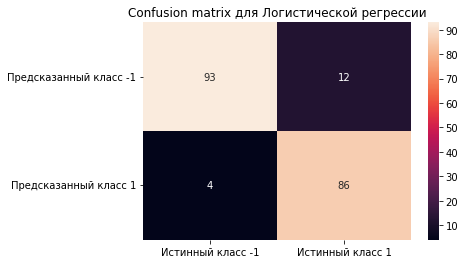

In [73]:
best_models = [(best2, 'Логистической регрессии'), (svc2, 'Метода опорных векторов'), (cat2, 'Градиентного бустинга'), (rf2, 'Случайного леса')]
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
def estimate(best2, name):
    plt.title(f'Confusion matrix для {name}')
    sns.heatmap(pd.DataFrame(confusion_matrix(best2.predict(X_test_cv_bigram), y_valid.astype(np.int64)),\
                            columns=['Истинный класс -1', 'Истинный класс 1'], index=['Предсказанный класс -1', \
                                   'Предсказанный класс 1']), annot=True, fmt='')
estimate(*best_models[0])

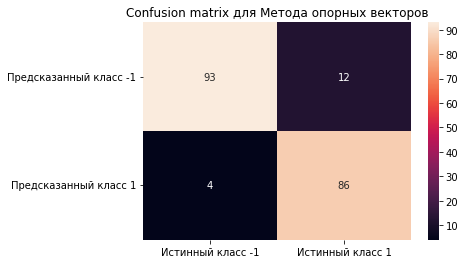

In [74]:
estimate(*best_models[1])

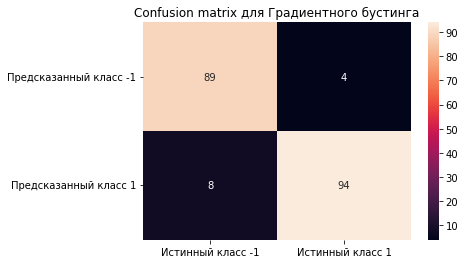

In [75]:
estimate(*best_models[2])

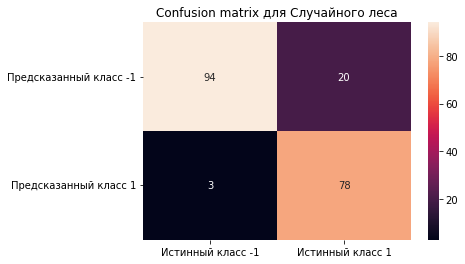

In [76]:
estimate(*best_models[3])

In [77]:
from sklearn.metrics import classification_report
def summarize(algo, name):
    print(f'Classification report для {name}')
    print(classification_report(algo.predict(X_test_cv_bigram), y_valid)

In [78]:
summarize(*best_models[0])

Classification report для Логистической регрессии
              precision    recall  f1-score   support

          -1       0.96      0.89      0.92       105
           1       0.88      0.96      0.91        90

    accuracy                           0.92       195
   macro avg       0.92      0.92      0.92       195
weighted avg       0.92      0.92      0.92       195



In [79]:
summarize(*best_models[1])

Classification report для Метода опорных векторов
              precision    recall  f1-score   support

          -1       0.96      0.89      0.92       105
           1       0.88      0.96      0.91        90

    accuracy                           0.92       195
   macro avg       0.92      0.92      0.92       195
weighted avg       0.92      0.92      0.92       195



In [80]:
summarize(*best_models[2])

Classification report для Градиентного бустинга
              precision    recall  f1-score   support

          -1       0.92      0.96      0.94        93
           1       0.96      0.92      0.94       102

    accuracy                           0.94       195
   macro avg       0.94      0.94      0.94       195
weighted avg       0.94      0.94      0.94       195



In [81]:
summarize(*best_models[3])

Classification report для Случайного леса
              precision    recall  f1-score   support

          -1       0.97      0.82      0.89       114
           1       0.80      0.96      0.87        81

    accuracy                           0.88       195
   macro avg       0.88      0.89      0.88       195
weighted avg       0.90      0.88      0.88       195



In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(best2.predict(X_test_cv_bigram), y_valid)

0.9206349206349207

In [177]:
import matplotlib.pyplot as plt 
import numpy as np 
def visualize_coefficients(classifier, feature_names, name, n_top_features=50):
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    figure, axis = plt.subplots(1, 2, figsize=(20,15))
    axis[0].bar(np.arange(n_top_features), coef[positive_coefficients])
    axis[1].bar(np.arange(n_top_features), abs(coef[negative_coefficients]))
    axis[0].set_title(f"Топ {n_top_features} положительных слов в словаре эмоциональной окраски для {name}")
    axis[1].set_title(f"Топ {n_top_features} негативных слов в словаре эмоциональной окраски для {name}")
    #axis[1].set_title(f"Топ 25 слов в словаре эмоциональной окраски для {name}")
    #plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    axis[0].set_xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[positive_coefficients],
        rotation=60,
        ha="right",
    );
    axis[1].set_xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[negative_coefficients],
        rotation=60,
        ha="right",
    );
    plt.show();

<Figure size 1080x360 with 0 Axes>

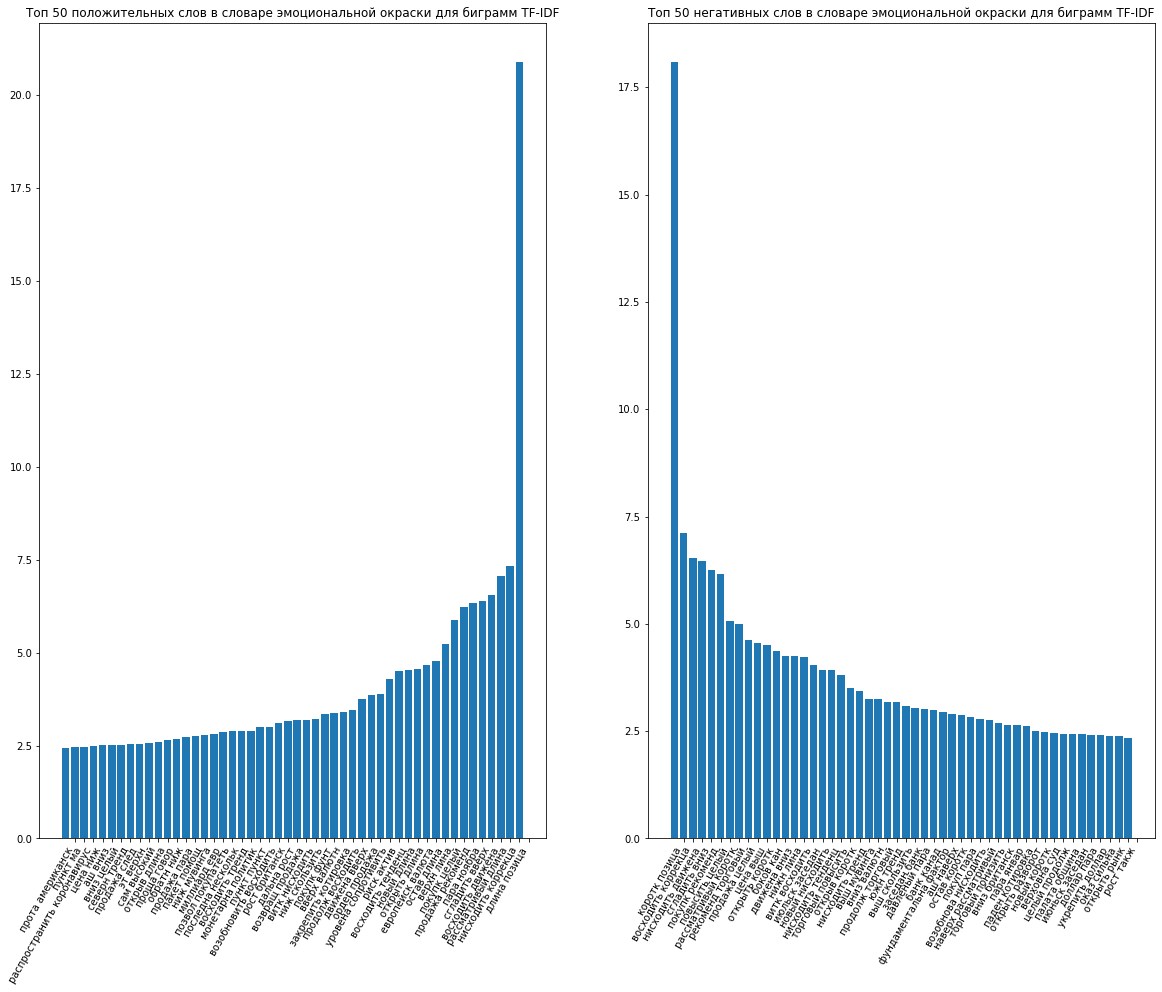

In [178]:
visualize_coefficients(best, tfid_bigram.get_feature_names(), 'биграмм TF-IDF')

<Figure size 1080x360 with 0 Axes>

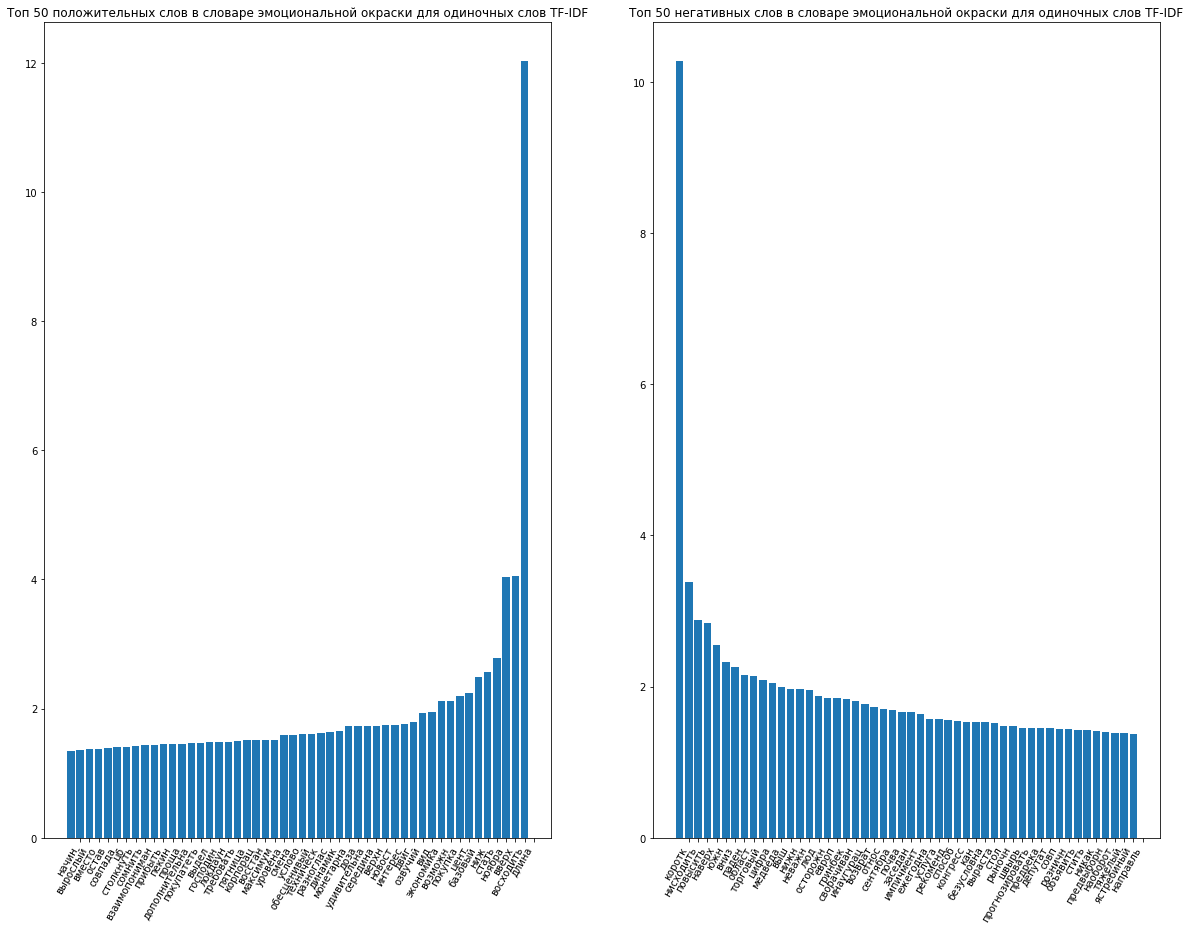

In [179]:
visualize_coefficients(best1, tfid_word.get_feature_names(), 'одиночных слов TF-IDF')

<Figure size 1080x360 with 0 Axes>

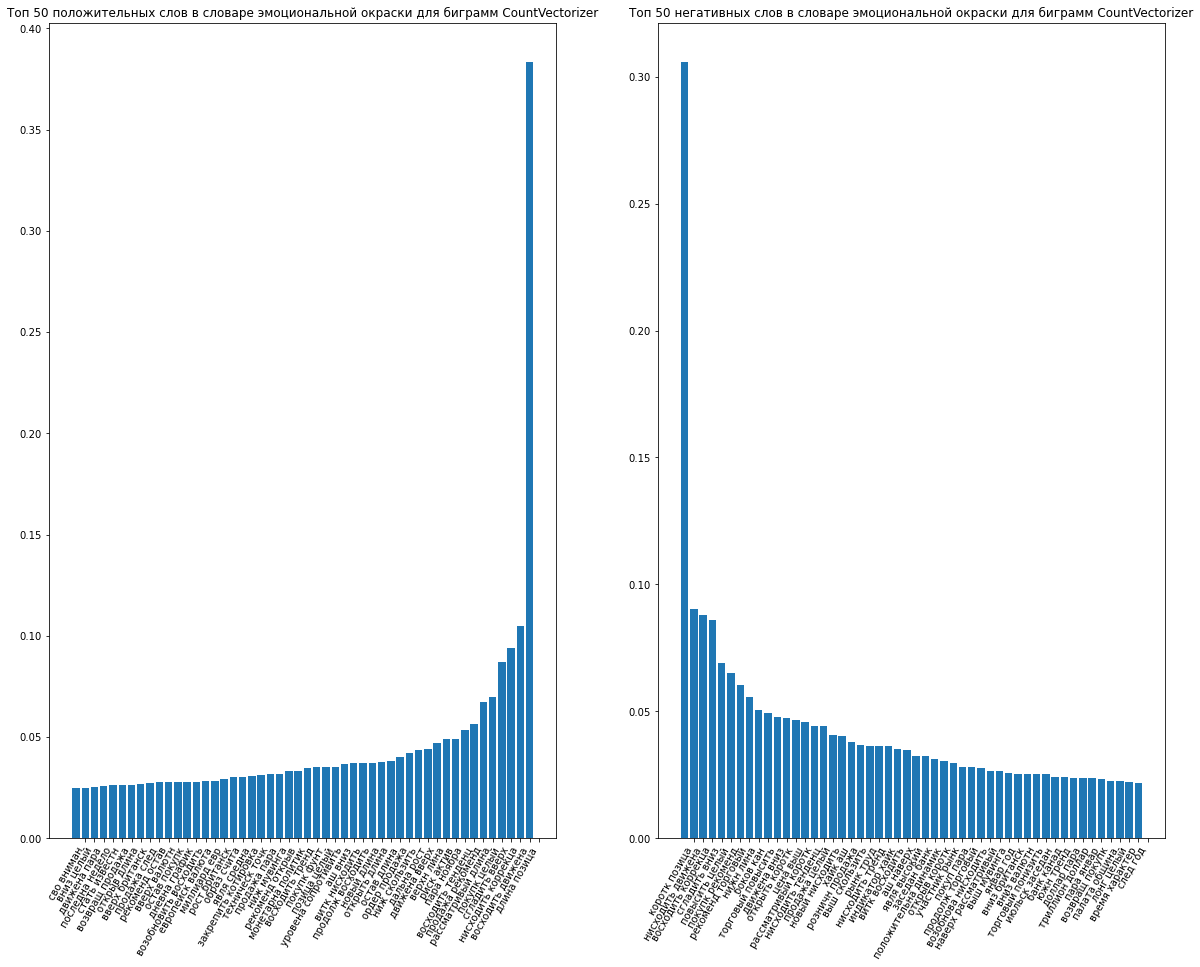

In [180]:
visualize_coefficients(best2, cv_bigram.get_feature_names(), 'биграмм CountVectorizer')

<Figure size 1080x360 with 0 Axes>

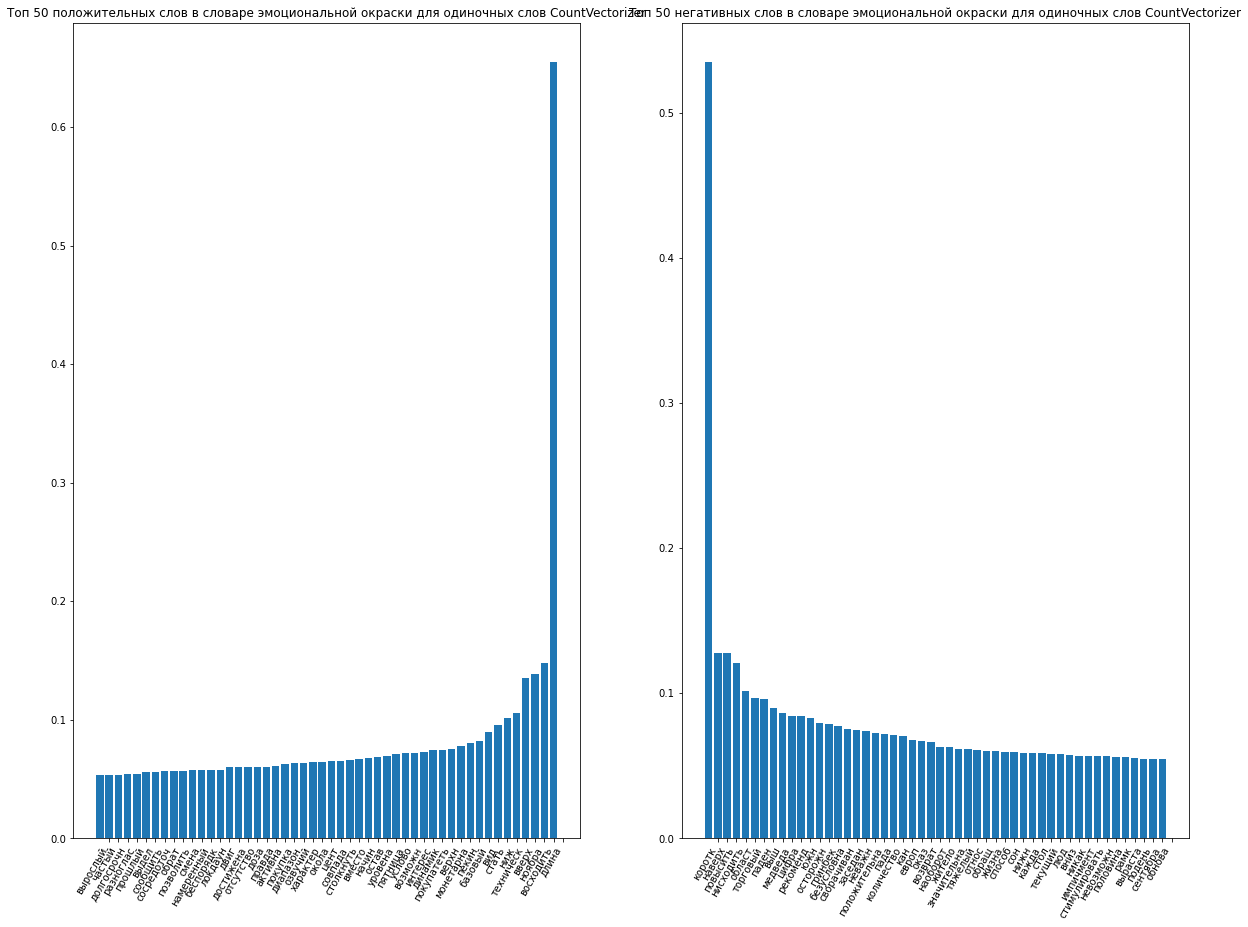

In [181]:
visualize_coefficients(best3, cv_word.get_feature_names(), 'одиночных слов CountVectorizer')

In [40]:
def save_dictionary(model, tfid, ngramm_name, path):
    coef = model.coef_.ravel() 
    feature_names = tfid.get_feature_names()
    indexes = np.argsort(coef)
    return pd.DataFrame(np.vstack([np.array(feature_names)[indexes], sorted(coef)]).T, \
                 columns=[ngramm_name, 'Вес'])#.to_csv(path, sep=' ', index=None)
dictionary = save_dictionary(best, tfid_bigram, 'Биграмма', b + 'bigrams_weights.csv')
#save_dictionary(best1, tfid_word, 'Одиночное слово', b + 'words_weights.csv')

C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
pm = pymorphy2.MorphAnalyzer()
def make_normal_form_word(text): 
    tokens = text.split()
    for i in range(len(tokens)):
        tokens[i] = pm.parse(transformation_dictionary.get(tokens[i], tokens[i]))[0][0]
    return " ".join(tokens)
dictionary['Биграмма'] = dictionary['Биграмма'].apply(make_normal_form_word)

C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)


In [63]:
negative = dictionary.head(100)
positive = dictionary.tail(100)
result = pd.concat([positive, negative])
result.sort_values('Вес', ascending=False).to_excel(r'C:\Users\Андрей\Desktop\asd\Dictionaries-of-emotional-assessment-in-finance\dict.xlsx', sheet_name='биграмма', index=False)

In [161]:
def visualize_coefficients(data, name, n_top_features=25):
    plt.figure(figsize=(15, 5))
    sh = data.shape[0]
    data = data.sort_values('Вес')
    colors = ["red" if c < 0 else "blue" for c in data['Вес']]
    plt.bar(np.arange(sh), data['Вес'], color=colors)
    plt.title(f'Лексикон')
    plt.xticks(
        np.arange(1, 1 + sh),
        data['Биграмма'],
        rotation=60,
        ha="right",
    );

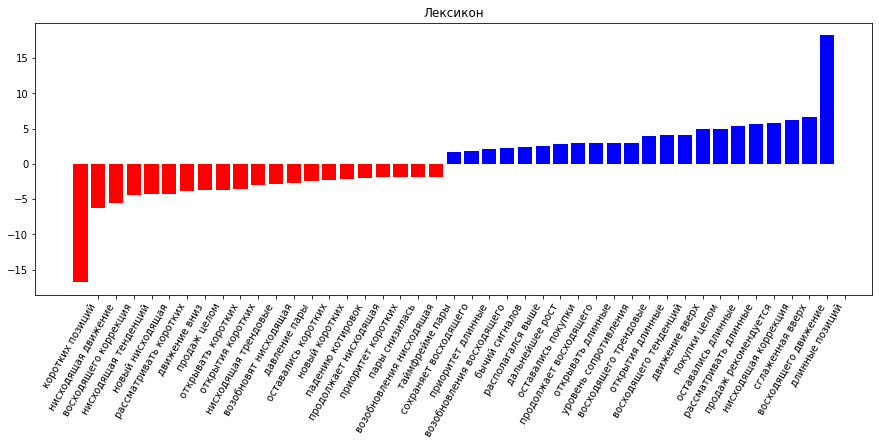

In [166]:
visualize_coefficients(t, 'beb')

In [165]:
t = d.drop([0, 23])